# Statistische Tests der gelabelten Daten aus der Datei "transactions_train_3.parquet

In [1]:
# -------------------------------------
# 1. Bibliotheken importieren
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


transactions = pd.read_parquet("transactions_train_3.parquet")


In [2]:
# -------------------------------------
# 2. Datenvorverarbeitung
# -------------------------------------

# Feature Engineering: Transaktionsdauer, Startzeitund Dauer pro Artikel
transactions['transaction_duration'] = (transactions['transaction_end'] - transactions['transaction_start']).dt.total_seconds()
transactions['hour_of_day'] = transactions['transaction_start'].dt.hour
transactions['weekday'] = transactions['transaction_start'].dt.day_name()
transactions["duration_per_line"] = (transactions['transaction_duration'] / transactions["n_lines"])

# -------------------------------------
# 3. Spalten definieren
# -------------------------------------

numerical_columns = ['total_amount', 'n_lines', 'customer_feedback', 'transaction_duration',"duration_per_line"]
categorical_columns = ['cash_desk', 'payment_medium', 'store_id','hour_of_day','weekday']


# -------------------------------------
# 4. Auswahl der gelabelten Zeilen
# -------------------------------------

labeled = transactions[transactions.label !="UNKNOWN"]

In [3]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148025 entries, 9 to 1481774
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    148025 non-null  object        
 1   store_id              148025 non-null  object        
 2   cash_desk             148025 non-null  int64         
 3   transaction_start     148025 non-null  datetime64[ns]
 4   transaction_end       148025 non-null  datetime64[ns]
 5   total_amount          148025 non-null  float64       
 6   n_lines               148025 non-null  int64         
 7   payment_medium        148025 non-null  object        
 8   customer_feedback     10644 non-null   float64       
 9   damage                148025 non-null  float64       
 10  label                 148025 non-null  object        
 11  transaction_duration  148025 non-null  float64       
 12  hour_of_day           148025 non-null  int32         
 13  wee

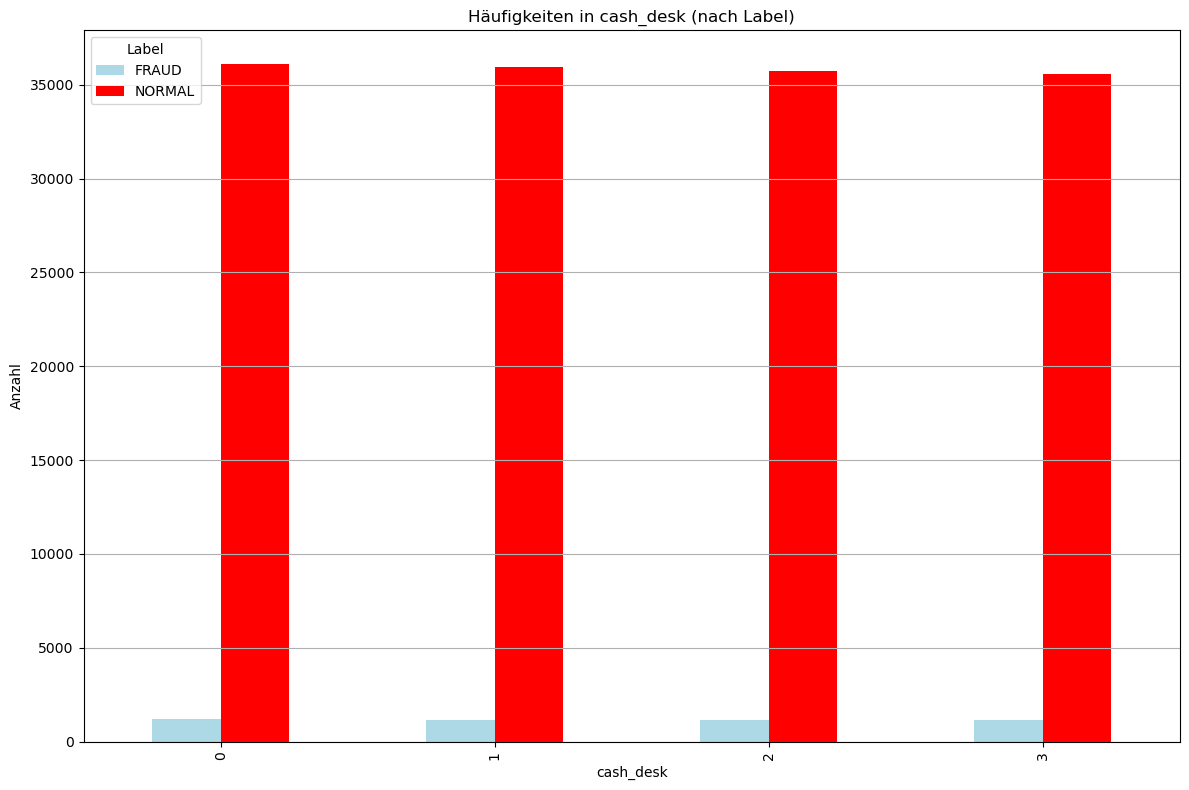


Absolute Häufigkeiten in 'cash_desk':
label      FRAUD  NORMAL
cash_desk               
0           1192   36092
1           1134   35959
2           1162   35733
3           1168   35585

Chi-Quadrat-Test für 'cash_desk':
  Chi² = 1.40, p-Wert = 0.7045, Freiheitsgrade = 3
  ➜ Kein signifikanter Unterschied (p ≥ 0.05)
------------------------------------------------------------


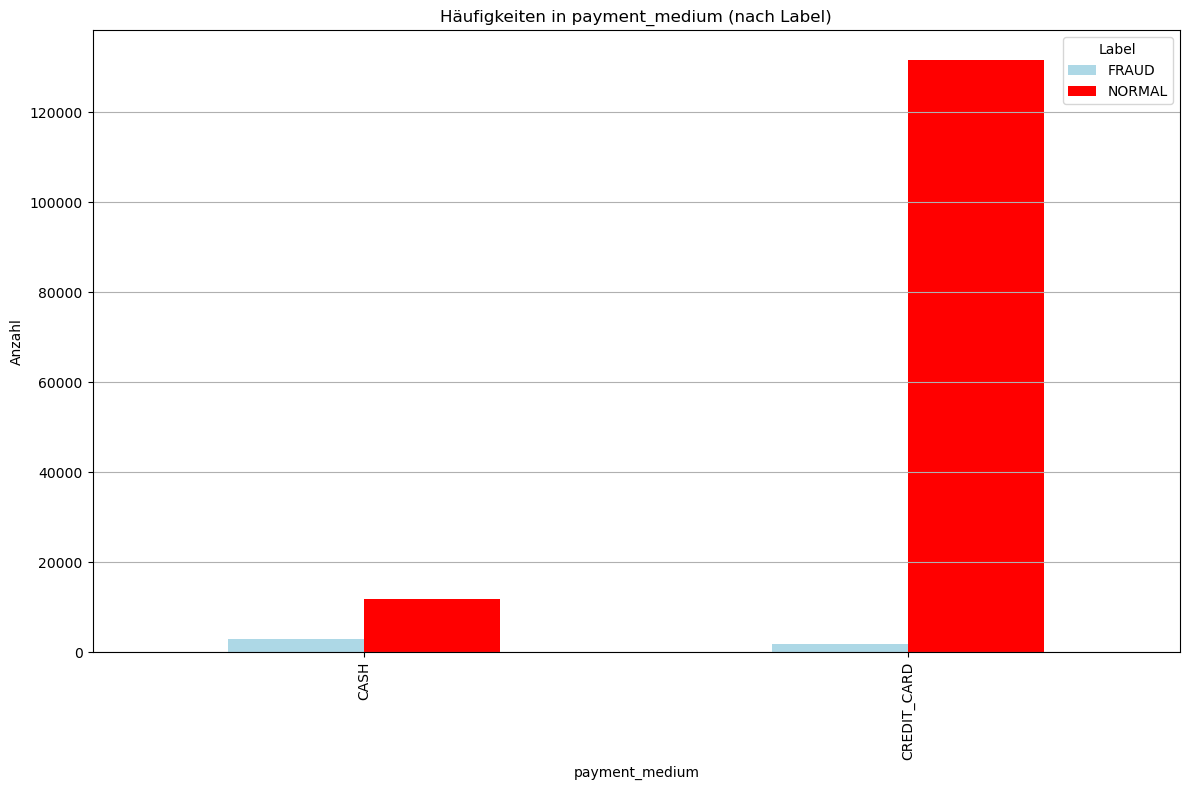


Absolute Häufigkeiten in 'payment_medium':
label           FRAUD  NORMAL
payment_medium               
CASH             2910   11779
CREDIT_CARD      1746  131590

Chi-Quadrat-Test für 'payment_medium':
  Chi² = 14860.45, p-Wert = 0.0000, Freiheitsgrade = 1
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


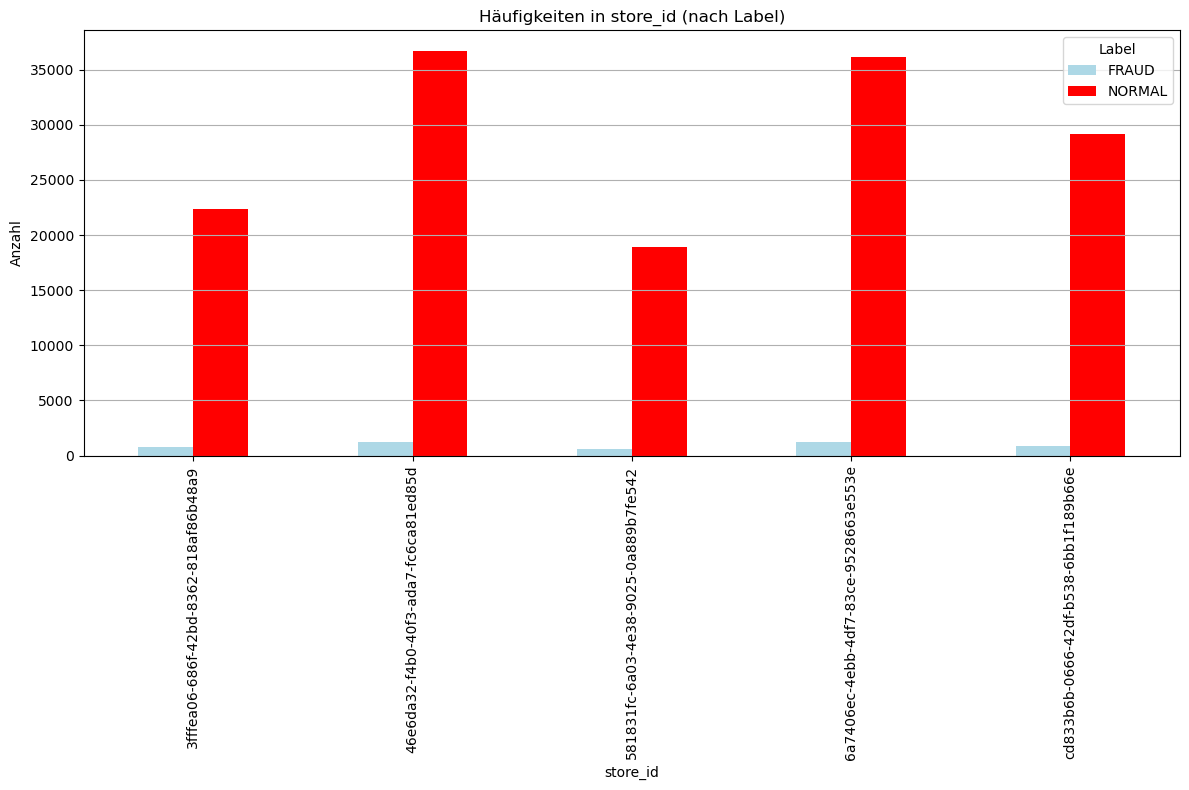


Absolute Häufigkeiten in 'store_id':
label                                 FRAUD  NORMAL
store_id                                           
3fffea06-686f-42bd-8362-818af86b48a9    746   22364
46e6da32-f4b0-40f3-ada7-fc6ca81ed85d   1200   36721
581831fc-6a03-4e38-9025-0a889b7fe542    605   18950
6a7406ec-4ebb-4df7-83ce-9528663e553e   1196   36182
cd833b6b-0666-42df-b538-6bb1f189b66e    909   29152

Chi-Quadrat-Test für 'store_id':
  Chi² = 2.55, p-Wert = 0.6350, Freiheitsgrade = 4
  ➜ Kein signifikanter Unterschied (p ≥ 0.05)
------------------------------------------------------------


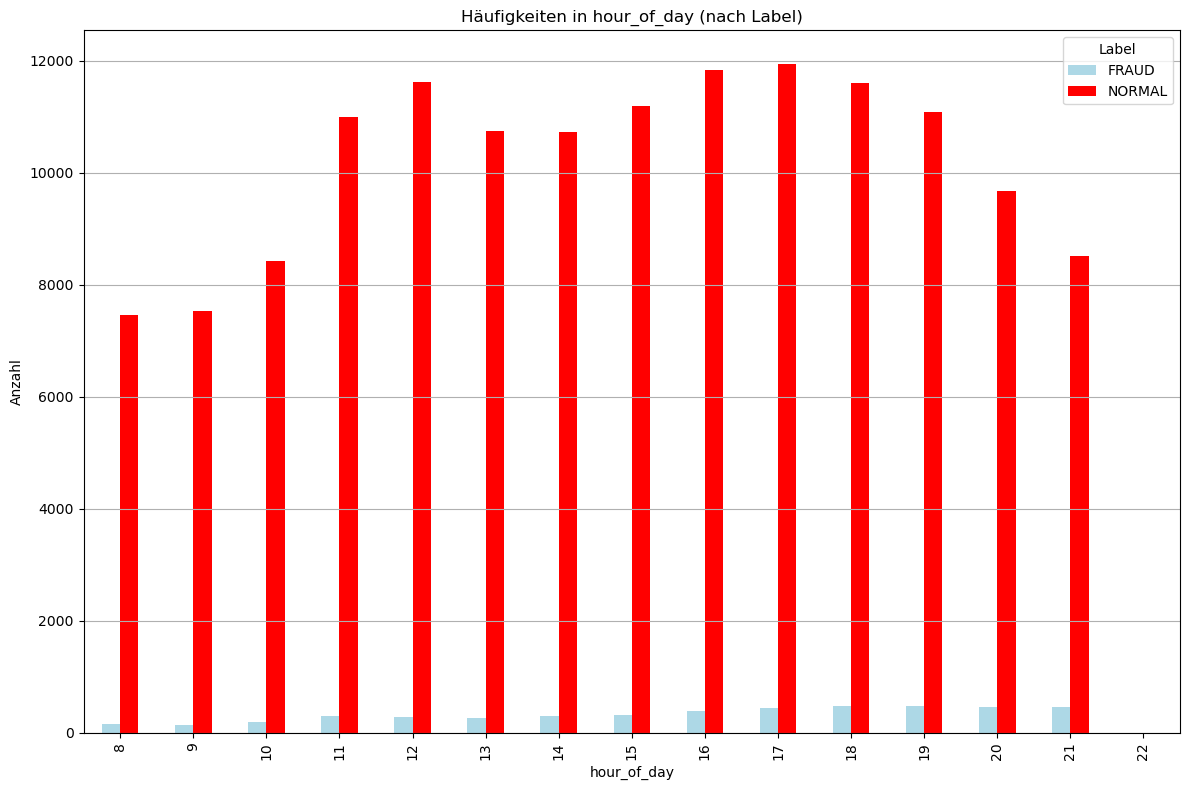


Absolute Häufigkeiten in 'hour_of_day':
label        FRAUD  NORMAL
hour_of_day               
8              158    7454
9              139    7535
10             195    8431
11             293   11004
12             289   11624
13             269   10740
14             298   10728
15             313   11188
16             393   11843
17             439   11946
18             479   11594
19             471   11091
20             460    9676
21             460    8514
22               0       1

Chi-Quadrat-Test für 'hour_of_day':
  Chi² = 405.08, p-Wert = 0.0000, Freiheitsgrade = 14
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


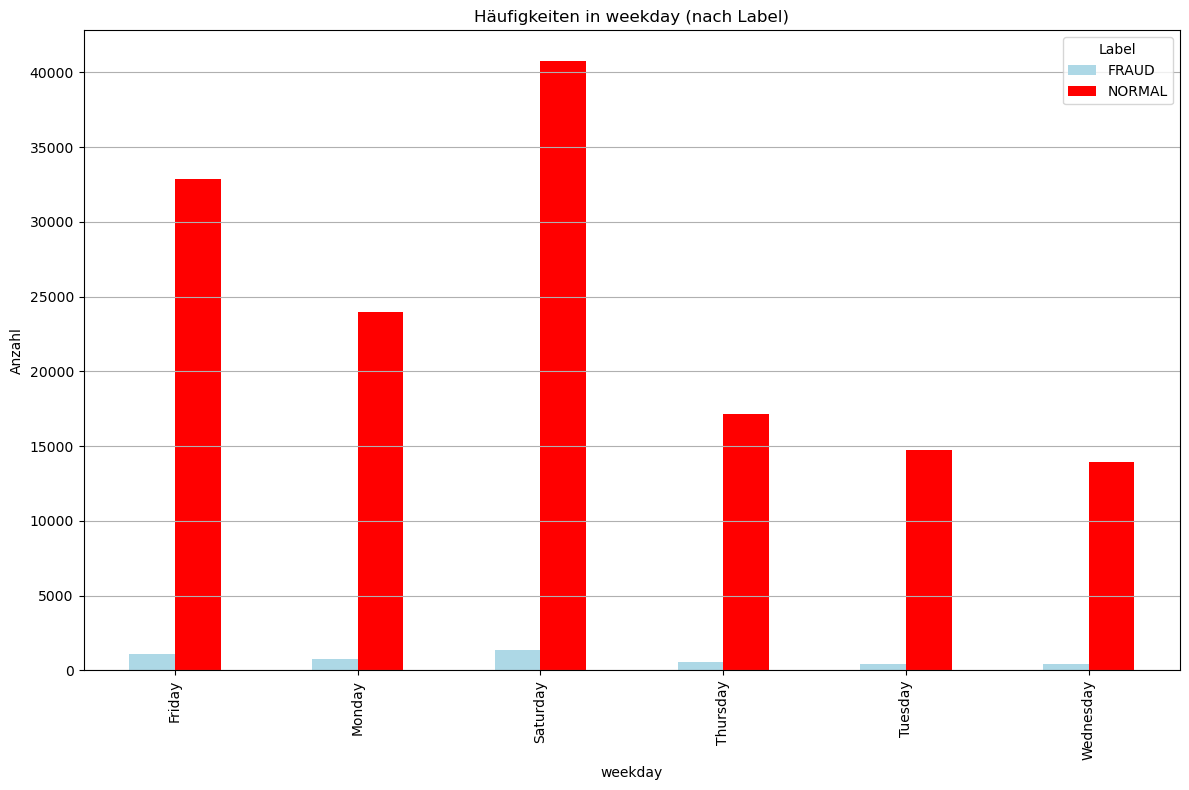


Absolute Häufigkeiten in 'weekday':
label      FRAUD  NORMAL
weekday                 
Friday      1080   32857
Monday       768   23949
Saturday    1377   40766
Thursday     591   17136
Tuesday      425   14744
Wednesday    415   13917

Chi-Quadrat-Test für 'weekday':
  Chi² = 13.21, p-Wert = 0.0215, Freiheitsgrade = 5
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


In [4]:
# -------------------------------------
# 5. Visualisierung und Chi-Quadrat-Test für kategorische Variablen
# -------------------------------------

from scipy.stats import chi2_contingency

for col in categorical_columns:
    # Kreuztabelle: absolute Häufigkeiten
    counts = pd.crosstab(labeled[col], labeled['label'])

    if counts.empty:
        print(f"Spalte '{col}' enthält keine gültigen Daten – wird übersprungen.")
        continue

    # Balkendiagramm: absolute Zahlen
    counts.plot(kind='bar', figsize=(12, 8), color=['lightblue', 'red'])
    plt.title(f'Häufigkeiten in {col} (nach Label)')
    plt.xlabel(col)
    plt.ylabel('Anzahl')
    plt.legend(title='Label')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Absolute Häufigkeiten ausgeben
    print(f"\nAbsolute Häufigkeiten in '{col}':")
    print(counts)

    # Chi-Quadrat-Test
    try:
        chi2, p, dof, expected = chi2_contingency(counts)
        print(f"\nChi-Quadrat-Test für '{col}':")
        print(f"  Chi² = {chi2:.2f}, p-Wert = {p:.4f}, Freiheitsgrade = {dof}")
        if p < 0.05:
            print("  ➜ Ergebnis ist signifikant (p < 0.05)")
        else:
            print("  ➜ Kein signifikanter Unterschied (p ≥ 0.05)")
    except ValueError as e:
        print(f"  Chi-Quadrat-Test konnte nicht durchgeführt werden: {e}")

    print('-' * 60)


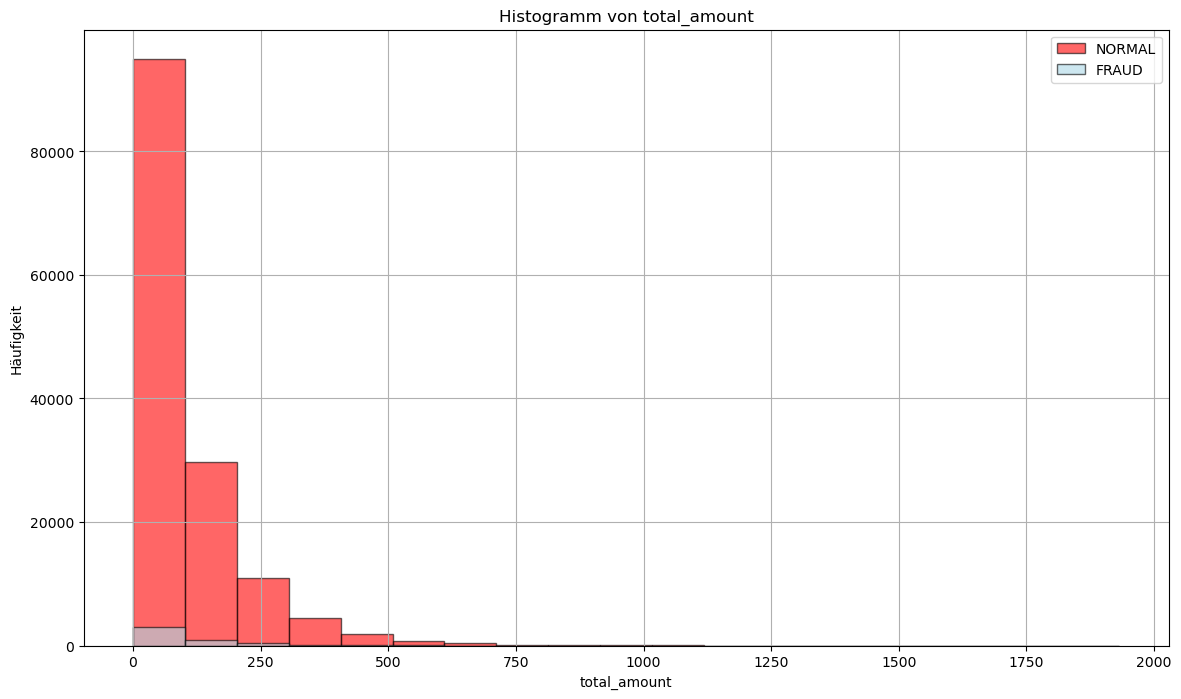

t-Test für 'total_amount':
  t-Wert = -0.85, p-Wert = 0.3948
  ➜ Kein signifikanter Unterschied
------------------------------------------------------------


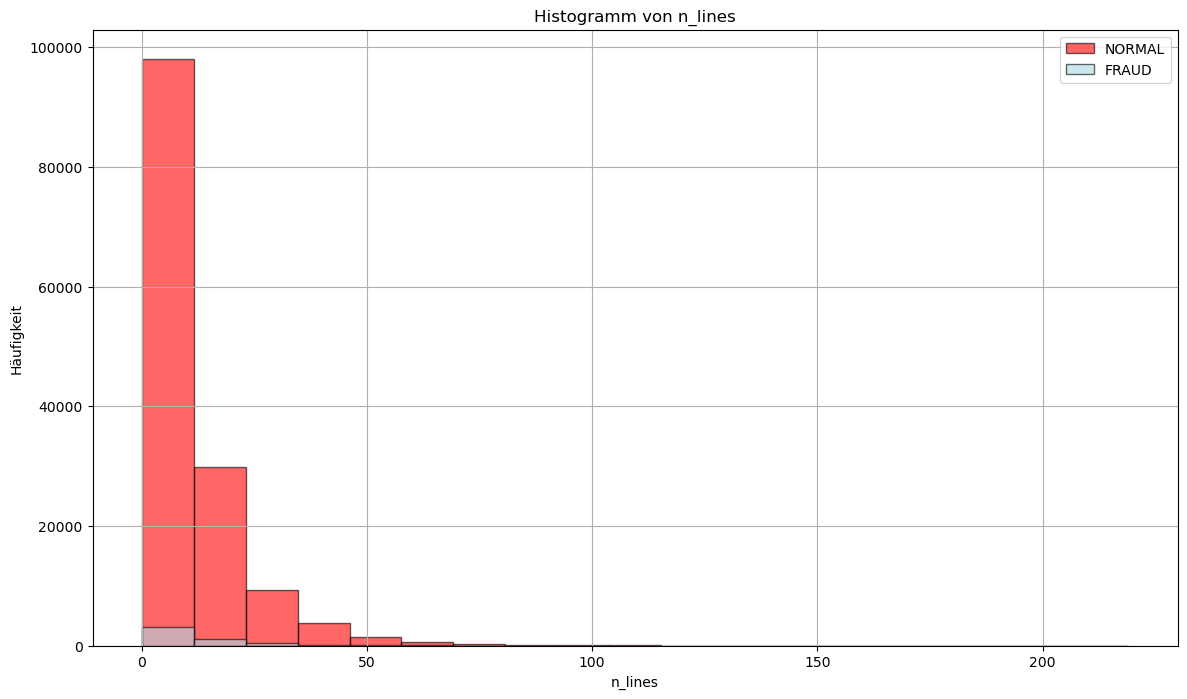

t-Test für 'n_lines':
  t-Wert = -4.41, p-Wert = 0.0000
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


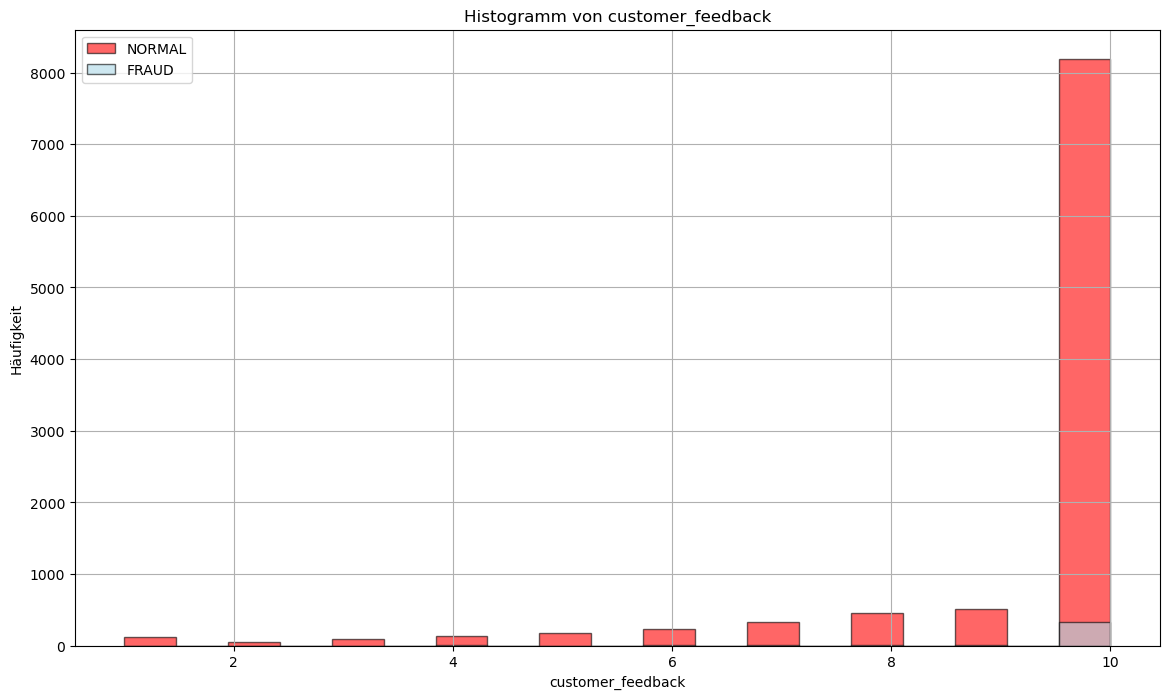

t-Test für 'customer_feedback':
  t-Wert = -10.03, p-Wert = 0.0000
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


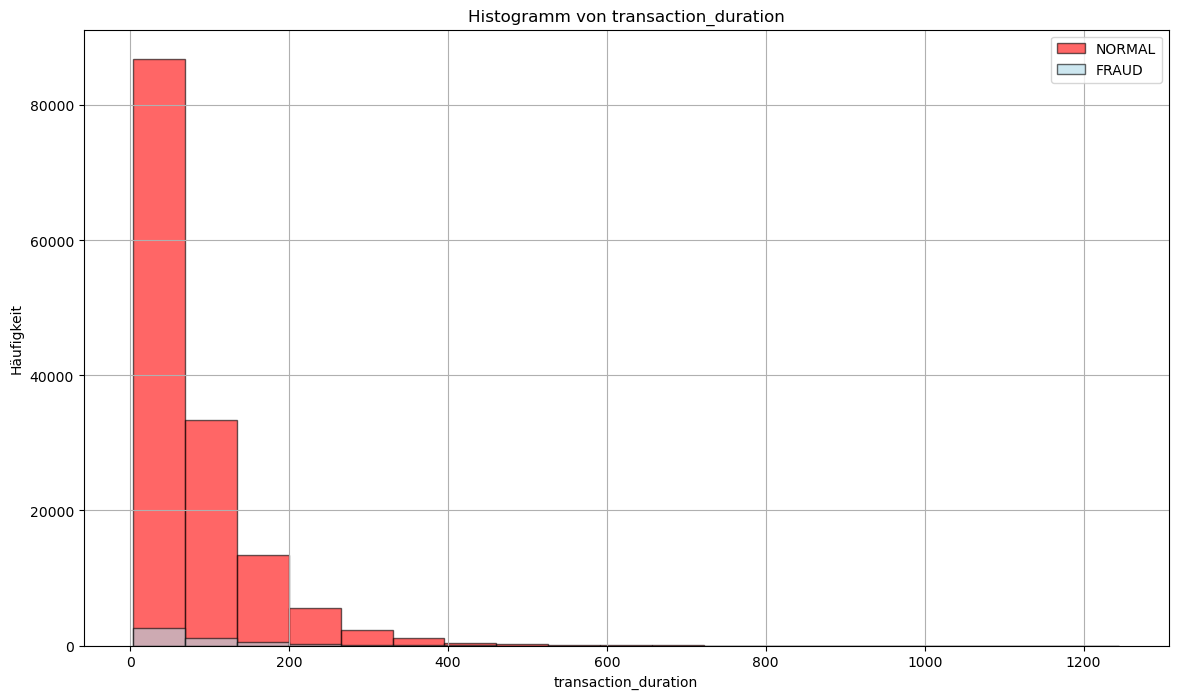

t-Test für 'transaction_duration':
  t-Wert = -5.23, p-Wert = 0.0000
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------


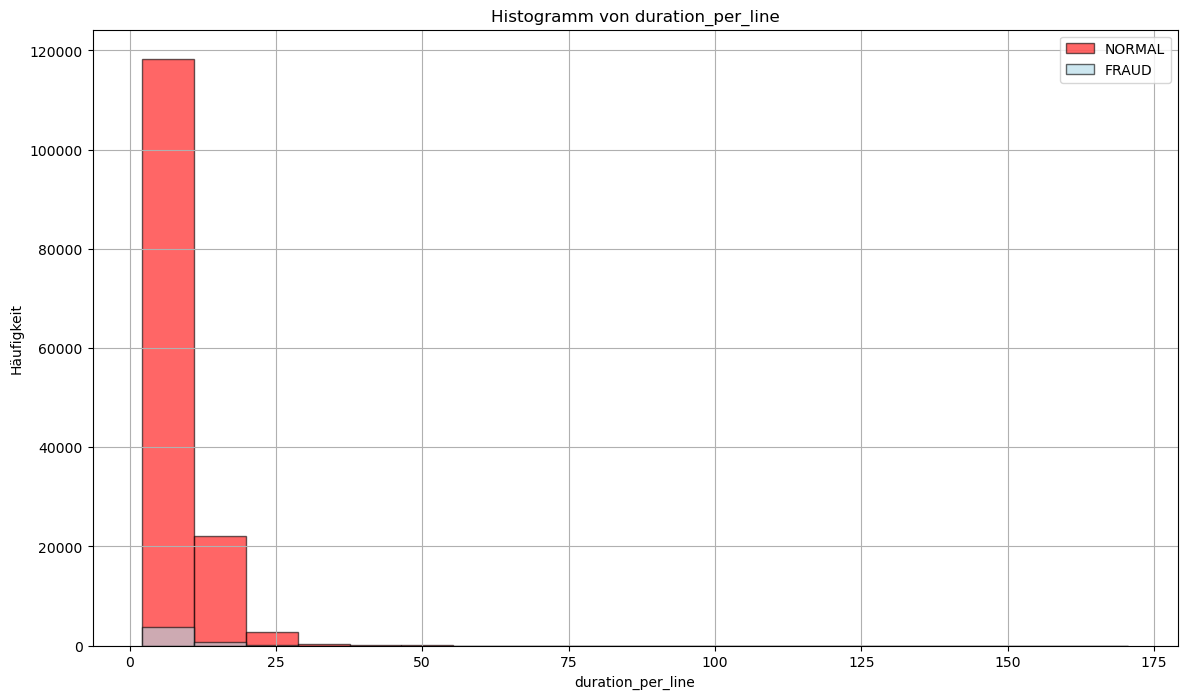

t-Test für 'duration_per_line':
  t-Wert = -4.78, p-Wert = 0.0000
  ➜ Ergebnis ist signifikant (p < 0.05)
------------------------------------------------------------

 Zusammenfassung der t-Tests für numerische Merkmale:

                 Spalte  t-Wert  p-Wert Signifikant (p < 0.05)
0          total_amount   -0.85  0.3948                   Nein
1               n_lines   -4.41  0.0000                     Ja
2     customer_feedback  -10.03  0.0000                     Ja
3  transaction_duration   -5.23  0.0000                     Ja
4     duration_per_line   -4.78  0.0000                     Ja


In [5]:
# -------------------------------------
# 6. Visualisierung und t-Test für numerische Variablen
# -------------------------------------

from scipy.stats import ttest_ind


# Ergebnisse für Übersicht sammeln
ttest_results = []

for col in numerical_columns:
    plt.figure(figsize=(14, 8))
    
    # Daten bereinigen: NaN und inf/-inf entfernen
    normal_data = labeled[labeled['label'] == 'NORMAL'][col].replace([np.inf, -np.inf], np.nan).dropna()
    fraud_data = labeled[labeled['label'] == 'FRAUD'][col].replace([np.inf, -np.inf], np.nan).dropna()

    # Skip falls Daten fehlen
    if normal_data.empty or fraud_data.empty:
        print(f"Spalte '{col}' hat keine gültigen Daten für eine der Gruppen – wird übersprungen.")
        continue

    # Gemeinsame Binning-Grenzen
    bins = 20
    min_val = min(normal_data.min(), fraud_data.min())
    max_val = max(normal_data.max(), fraud_data.max())

    if min_val == max_val:
        print(f"Spalte '{col}' hat keine Varianz – wird übersprungen.")
        continue

    bin_edges = np.linspace(min_val, max_val, bins)

    # Histogramm
    plt.hist(normal_data, bins=bin_edges, alpha=0.6, label='NORMAL', color='red', edgecolor='black')
    plt.hist(fraud_data, bins=bin_edges, alpha=0.6, label='FRAUD', color='lightblue', edgecolor='black')

    plt.title(f'Histogramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.legend()
    plt.grid(True)
    plt.show()

    # T-Test
    try:
        t_stat, p_val = ttest_ind(normal_data, fraud_data, equal_var=False)  # Welch-Test (varianzen-unterschiedlich)
        signifikant = p_val < 0.05

        print(f"t-Test für '{col}':")
        print(f"  t-Wert = {t_stat:.2f}, p-Wert = {p_val:.4f}")
        print("  ➜ Ergebnis ist signifikant (p < 0.05)" if signifikant else "  ➜ Kein signifikanter Unterschied")
        
        ttest_results.append({
            'Spalte': col,
            't-Wert': round(t_stat, 2),
            'p-Wert': round(p_val, 4),
            'Signifikant (p < 0.05)': 'Ja' if signifikant else 'Nein'
        })

    except Exception as e:
        print(f"t-Test für '{col}' nicht durchführbar: {e}")
        ttest_results.append({
            'Spalte': col,
            't-Wert': None,
            'p-Wert': None,
            'Signifikant (p < 0.05)': 'Fehler'
        })

    print('-' * 60)

# Zusammenfassung als DataFrame anzeigen
ttest_summary = pd.DataFrame(ttest_results)
print("\n Zusammenfassung der t-Tests für numerische Merkmale:\n")
print(ttest_summary)


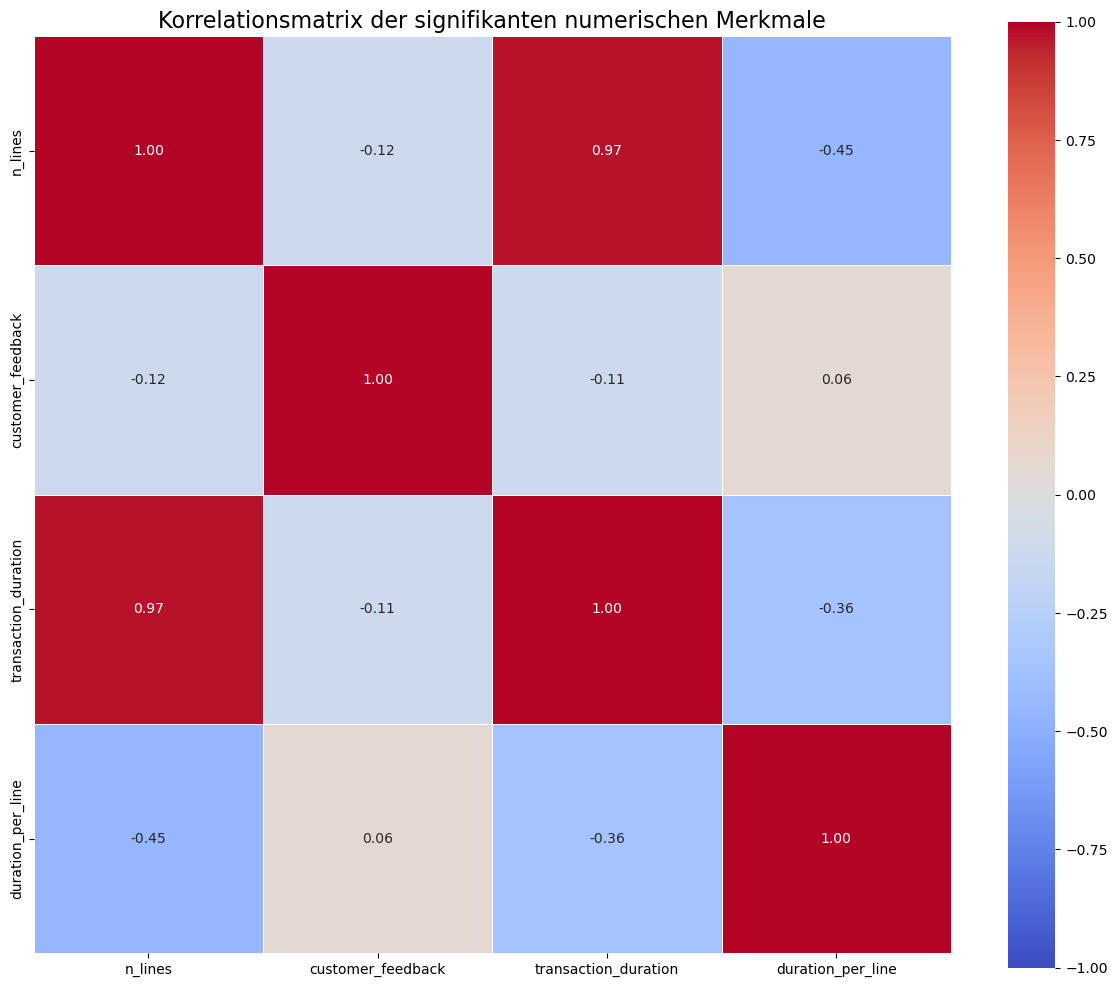

In [6]:
# -------------------------------------
# 6. Korrelationsmatrix der signifikanten numerischen Merkmale
# -------------------------------------
significant_features = ['n_lines',"customer_feedback" ,'transaction_duration', 'duration_per_line']

# Daten filtern
df_corr = labeled[significant_features].replace([np.inf, -np.inf], np.nan).dropna()

# Korrelationsmatrix berechnen
corr_matrix = df_corr.corr(method='pearson')

# Heatmap darstellen
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True,
            linewidths=0.5, linecolor='white')
plt.title("Korrelationsmatrix der signifikanten numerischen Merkmale", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Public\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


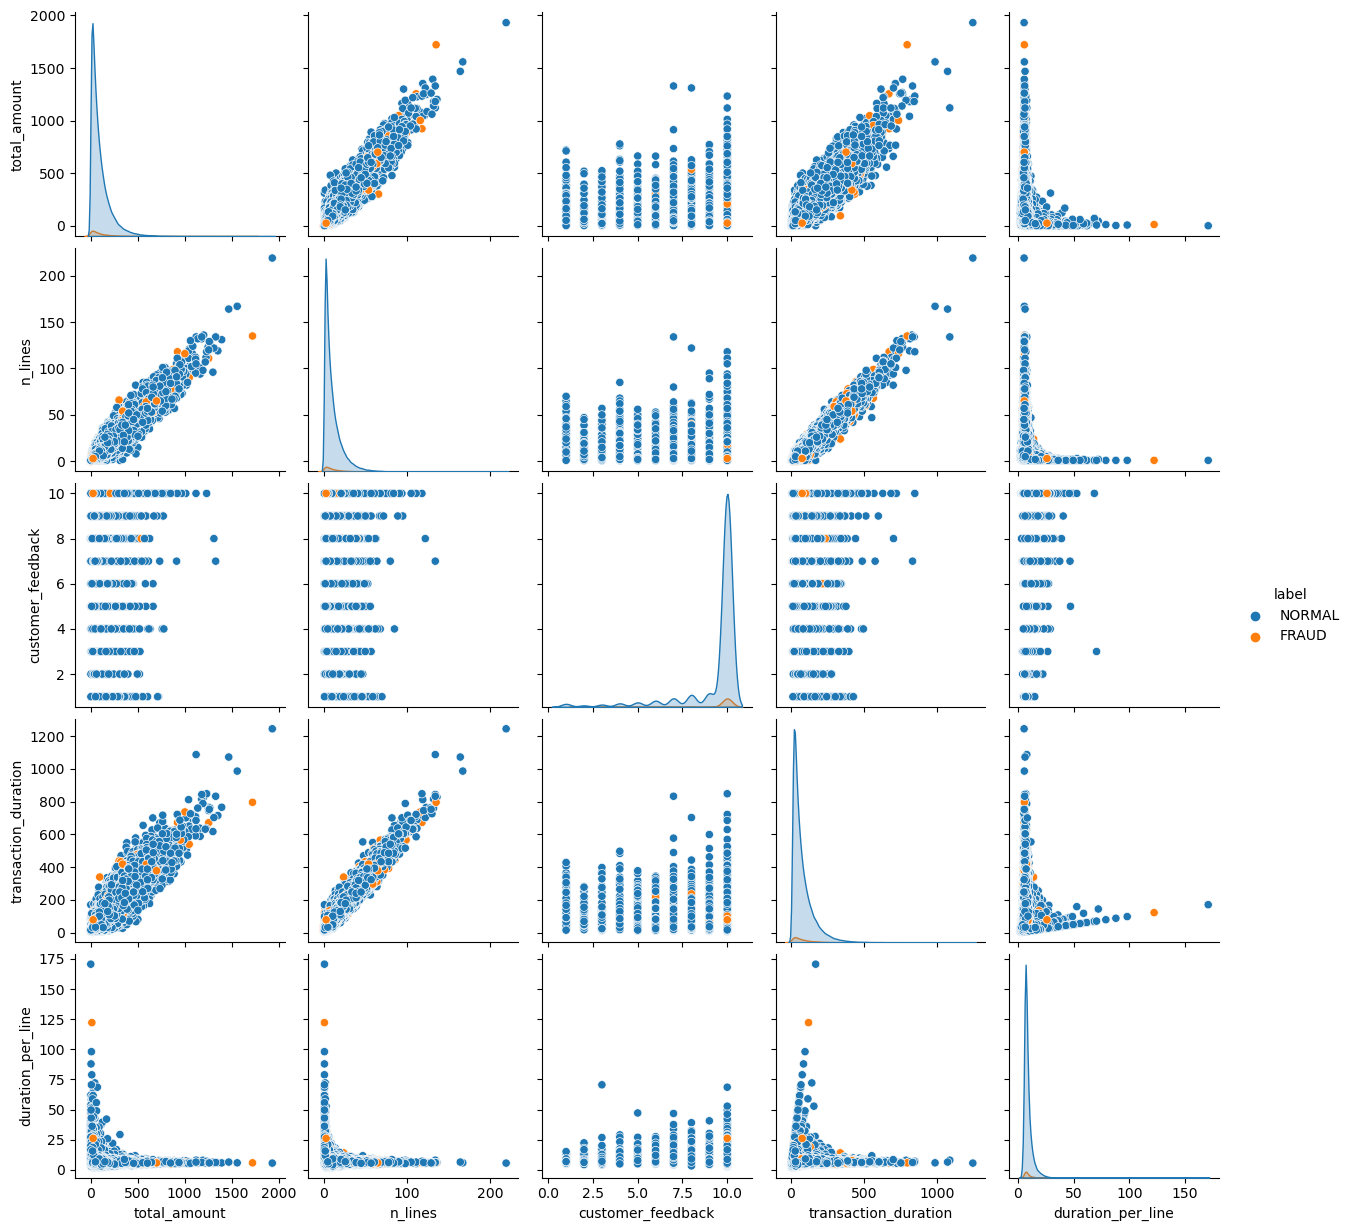

In [7]:
sns.pairplot(labeled[numerical_columns + ['label']], hue="label")


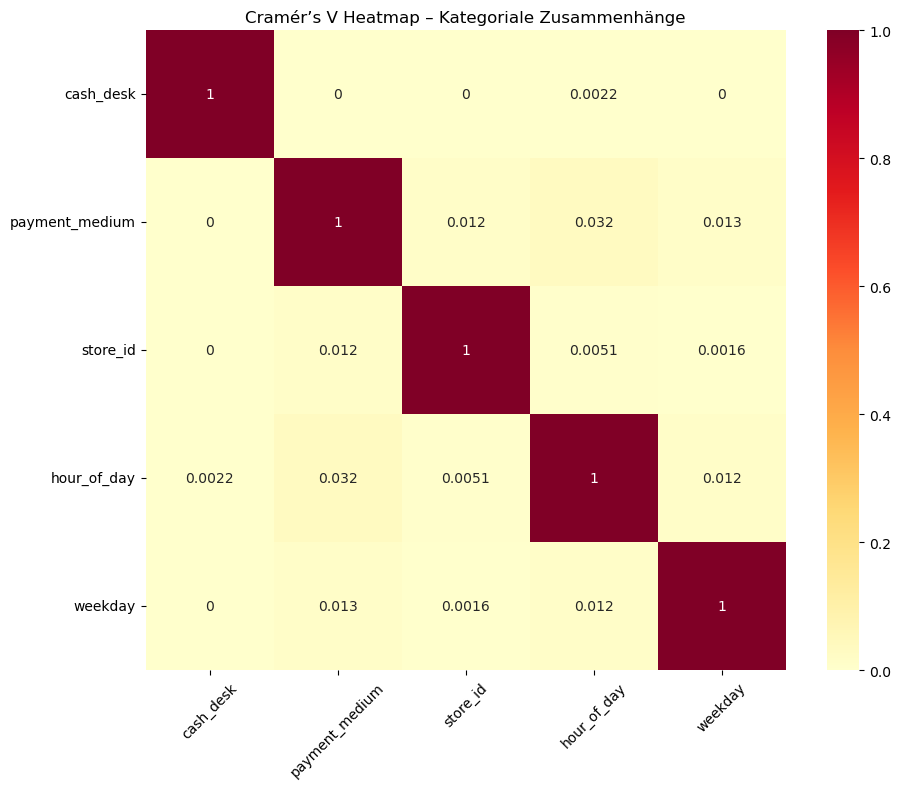

In [8]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Berechnet Cramér’s V zwischen zwei kategorialen Variablen."""
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan  # keine sinnvolle Berechnung möglich
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias-Korrektur nach Bergsma
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def cramers_v_matrix(df, categorical_columns):
    """Erstellt eine Matrix aller Cramér’s V-Werte für kategoriale Variablen."""
    matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0
            else:
                matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return matrix

# Berechnung und Visualisierung
cramers_matrix = cramers_v_matrix(labeled, categorical_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="YlOrRd", vmin=0, vmax=1, square=True)
plt.title("Cramér’s V Heatmap – Kategoriale Zusammenhänge")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
